In [74]:
import tensorflow
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [75]:
# !pip install opencv-python

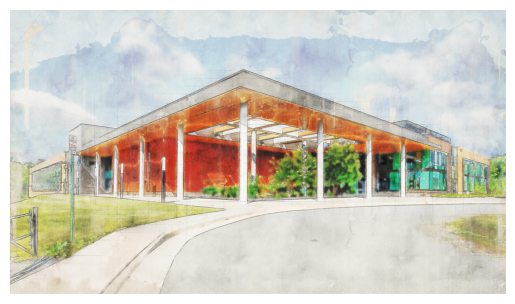

In [103]:
import cv2
import numpy as np
import requests

url = "https://cmsv2-assets.apptegy.net/uploads/22048/file/3278635/px2560_d4607619-5133-4c6a-9855-fd028f169ae6.png"
resp = requests.get(url)
image_array = np.asarray(bytearray(resp.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

#Convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.show()

In [91]:
cv2.imwrite("pcb.png", image)

True

In [92]:
image.shape

(752, 1000, 3)

In [93]:
# Compute new dimensions (25% of original)
scale = 1  # 25% of original size
new_width = int(image.shape[1] * scale)
new_height = int(image.shape[0] * scale)
new_dim = (new_width, new_height)

# Resize image
image = cv2.resize(image, new_dim, interpolation=cv2.INTER_AREA)

In [100]:
kernel = [[np.zeros([3,3], dtype = np.float16) for _ in range(3)] for _ in range(3)]

kernel[0][0] = np.array([[ 0, 0,  0],
                   [0,  1,  0],
                   [ 0, 0,  0]])
kernel[0][1] = np.array([[ -1, 0,  1],
                   [-1,  0,  1],
                   [ -1, 0,  1]])
kernel[0][2] = np.array([[ 1, 0,  -1],
                       [1,  0,  -1],
                      [ 1, 0,  -1]])
kernel[1][0] = np.array([[ 1, 1,  1],
                       [0,  0,  0],
                      [ -1, -1,  -1]])
kernel[1][1] = np.array([[ 0, 1,  0],
                        [1,  -4,  1],
                      [ 0, 1,  0]])
kernel[1][2] = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
kernel[2][0] = np.array([[1,4,1],[1,9,1],[1,4,1]])/23

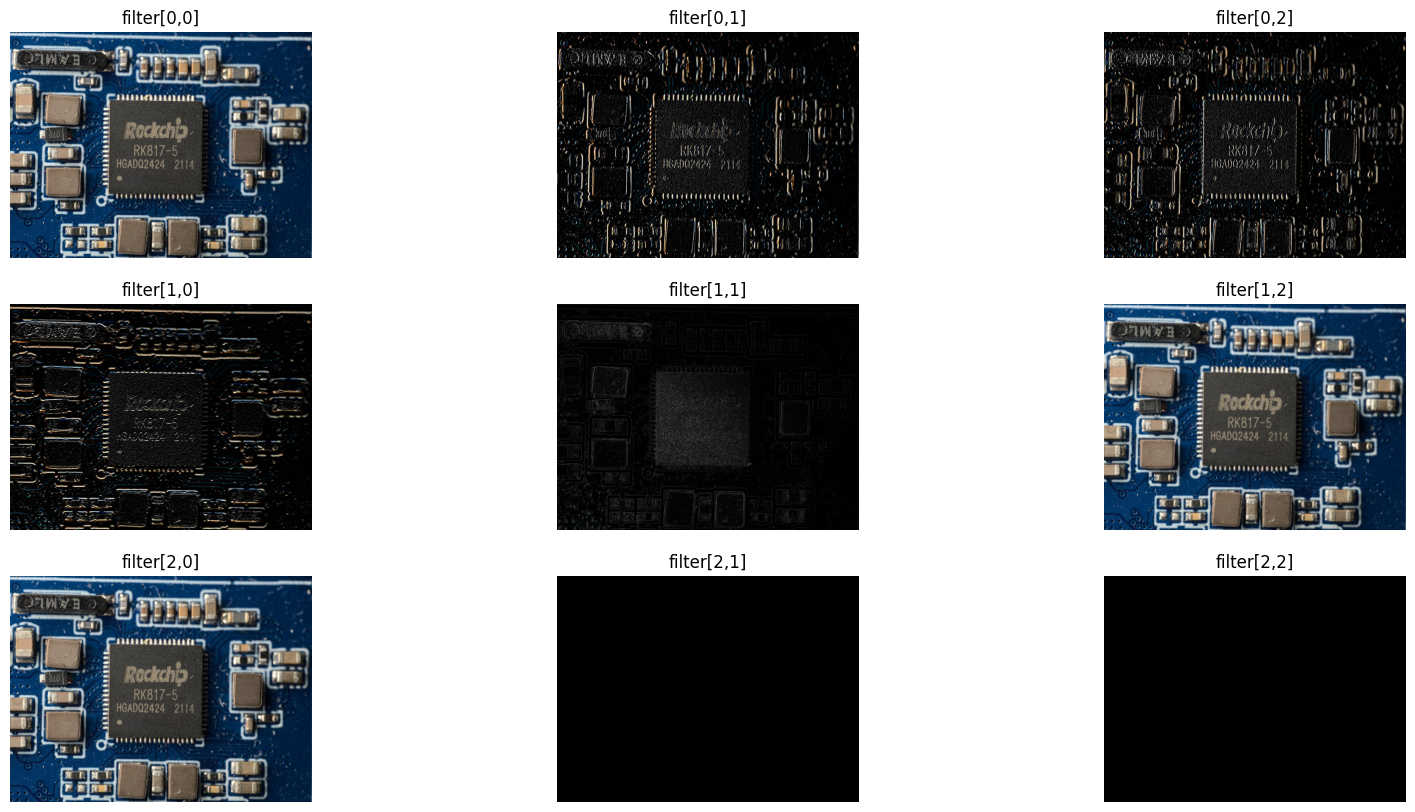

In [101]:
# Display the result
plt.figure(figsize=(20,10))
for r in range(3):
    for c in range(3):
        filtered_image = cv2.filter2D(image, -1, kernel[r][c])
        plt.subplot(3,3,3*r+c+1)
        plt.imshow(filtered_image)
        plt.axis("off")
        plt.title(f"filter[{r},{c}]")
plt.show()

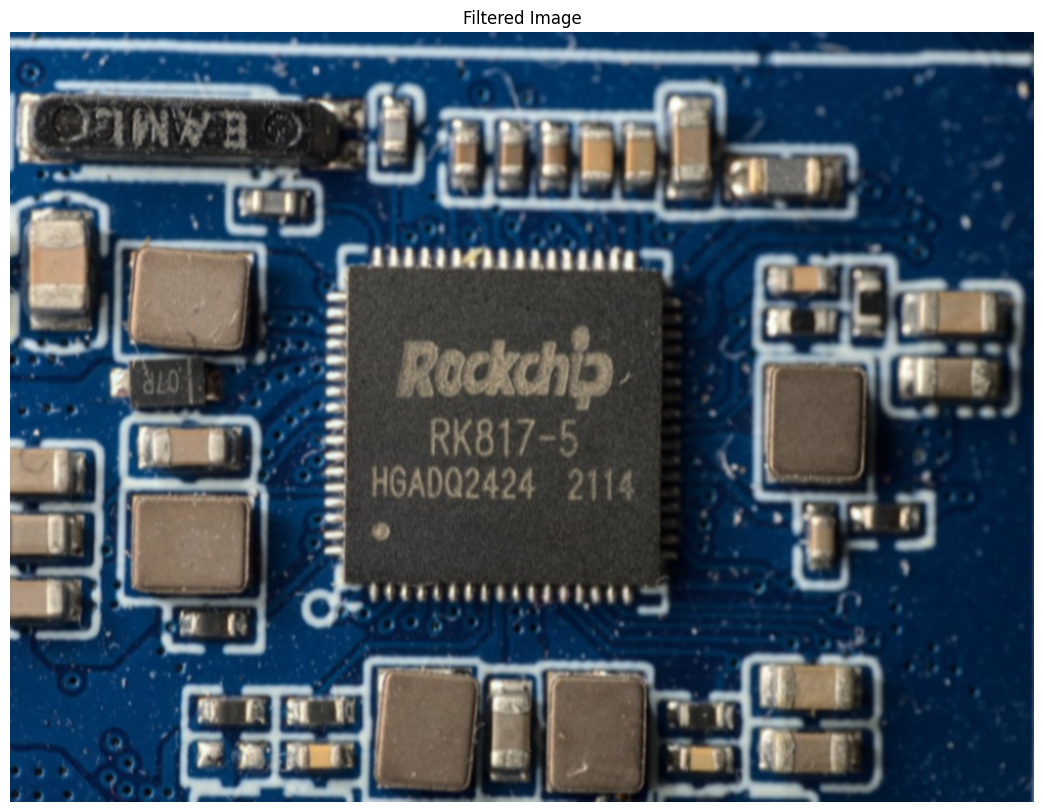

In [102]:
#image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Define a kernel (3x3 sharpening filter)
k = kernel[2][0]

# Apply convolution
filtered_image = cv2.filter2D(image, -1, k)
filtered_image = cv2.filter2D(filtered_image, -1, k)
filtered_image = cv2.filter2D(filtered_image, -1, k)
filtered_image = cv2.filter2D(filtered_image, -1, k)

plt.figure(figsize=(20, 10))

plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.axis("off")

plt.show()